In [1]:
import pandas as pd
import re

In [2]:
 data = pd.read_csv("Data/Clean_Data_2021_server.csv")

In [3]:
data.head()

,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,mager,mbstate_rec,mrace31,mrace15,mhispx,...,ca_gast,ca_limb,ca_cleft,ca_clpal,ca_downs,ca_disor,ca_hypo,itran,ilive,bfed
0,2021,1,636.0,7,1.0,22,1.0,1,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2021,1,259.0,7,1.0,31,1.0,22,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2021,1,223.0,1,1.0,29,1.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2021,1,241.0,1,1.0,39,1.0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,2021,1,503.0,1,1.0,20,2.0,5,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Linear regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
import numpy as np

# Step 1: Identify relevant features
relevant_features = ['oegest_comb', 'no_abnorm','combgest', 'gestrec3', 'dbwt'
                      , 'rdmeth_rec', 'me_rout', 'ld_ster', 'ab_surf',
       'ab_anti', 'itran', 'ab_aven6', 'cig_3', 'ab_nicu','ab_aven1']

# Step 2: Prepare the data
X = data[relevant_features].values
y = data['apgar5'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)


# Calculate MSE for training and testing datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


# Calculate RMSE for training and testing datasets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate standard deviation of the goal function
goal_function_std = np.std(y)

# Compare RMSE of the testing dataset to the standard deviation of the goal function
if rmse_test < goal_function_std:
    print("The RMSE of the testing dataset is less than the standard deviation of the goal function.")
else:
    print("The RMSE of the testing dataset is greater than or equal to the standard deviation of the goal function.")

print('R-squared value:', r2)
print('rmse_train value:', rmse_train)
print('rmse_test value:', rmse_test)
print('goal_function_std value:', goal_function_std)

# Step 5: Interpret the results
coefficients = dict(zip(relevant_features, model.coef_))
print('Coefficients:', coefficients)


The RMSE of the testing dataset is less than the standard deviation of the goal function.
R-squared value: 0.06098178289612821
rmse_test value: 5.946190790933676
rmse_test value: 5.962648949678992
goal_function_std value: 6.114371613336767
Coefficients: {'oegest_comb': 0.3392247480786608, 'no_abnorm': 2.424863835412556, 'combgest': 0.13861344516118212, 'gestrec3': -1.5671789918136705, 'dbwt': -4.58431755090416e-05, 'rdmeth_rec': 0.5293725354091054, 'me_rout': -0.4331470060063084, 'ld_ster': -0.11617328157007037, 'ab_surf': -0.07705529511139014, 'ab_anti': 0.1839456775037525, 'itran': -0.3121262904874118, 'ab_aven6': -0.5656239346716301, 'cig_3': 0.034005453466456864, 'ab_nicu': 2.539805226279383, 'ab_aven1': 0.4819205069184443}


In [ ]:
#better features selection

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Step 1: Handle missing values
data.dropna(inplace=True)

# Step 2: Prepare the data
X = data.drop(['apgar5'], axis=1).values
y = data['apgar5'].values

# Step 3: Apply feature selection algorithm
k = 15  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
all_feature_names = data.drop(['apgar5'], axis=1).columns
selected_feature_names = [all_feature_names[i] for i in selected_feature_indices]

# Step 4: Fit the model using selected features
model = LinearRegression()
model.fit(X_selected, y)

# Step 5: Evaluate the model
y_pred = model.predict(X_selected)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
explained_var = explained_variance_score(y, y_pred)

# Print the selected features and their corresponding scores
feature_scores = dict(zip(all_feature_names, selector.scores_))
print("Feature Scores:")
for feature, score in feature_scores.items():
    print(f"{feature}: {score}")

print('Selected Features:', selected_feature_names)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)
print('Explained Variance Score:', explained_var)


/raid/omer_david/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/raid/omer_david/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/raid/omer_david/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


Feature Scores:
dob_yy: nan
dob_mm: 2.5647634151186782
dob_tt: 0.5679886755736907
dob_wk: 70.24078516703723
bfacil: 8005.332689567348
mager: 163.0704422476891
mbstate_rec: 1841.8009641285837
mrace31: 0.6495767159056967
mrace15: 4.0541746451036484
mhispx: 908.6462981777465
dmar: 690.2007624930217
meduc: 223.15192702631984
fagecomb: 219.78682158224896
frace31: 0.4379863540047302
frace15: 0.12812456702652156
fhispx: 718.6205828342813
feduc: 433.7660694040165
priorlive: 2298.5183241740374
priordead: 72.73875847705739
priorterm: 100.13541008947989
lbo_rec: 2214.5441763930808
tbo_rec: 1087.8262367318002
illb_r11: 3819.2647183719564
ilop_r11: 2.4121412087104635e-05
ilp_r11: 2928.591121489669
precare: 113.12090512851206
previs: 734.1778029239496
cig_0: 308.30341847796694
cig_1: 257.69440601088615
cig_2: 234.6237040419402
cig_3: 217.2938225138782
m_ht_in: 195.302325723348
bmi: 6787.454604212821
pwgt_r: 5555.823809798463
dwgt_r: 5638.889611209249
wtgain: 0.205048506792059
rf_pdiab: 2551.84285719

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

data.dropna()

# Step 1: Prepare the data
X = data.drop(['apgar5'], axis=1).values
y = data['apgar5'].values

# Step 2: Apply feature selection algorithm
estimator = LinearRegression()
n_features_to_select = 30  # Number of top features to select
rfe = RFE(estimator, n_features_to_select)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the selected feature names
all_feature_names = data.drop(['apgar5'], axis=1).columns
selected_feature_names = [all_feature_names[i] for i in selected_feature_indices]

# Step 3: Fit the model using selected features
model = LinearRegression()
model.fit(X_selected, y)

# Step 4: Evaluate the model
y_pred = model.predict(X_selected)
r2 = model.score(X_selected, y)

# Print the selected features
print('Selected Features:', selected_feature_names)
print('R-squared value:', r2)


/raid/omer_david/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Selected Features: ['bfacil', 'mbstate_rec', 'rf_pdiab', 'rf_phype', 'rf_ghype', 'rf_ehype', 'ob_ecvs', 'ob_ecvf', 'ld_ster', 'ld_chor', 'me_rout', 'rdmeth_rec', 'mm_mtr', 'mm_rupt', 'mm_aicu', 'ab_aven1', 'ab_aven6', 'ab_nicu', 'ab_surf', 'ab_anti', 'ab_seiz', 'ca_anen', 'ca_mnsb', 'ca_cchd', 'ca_cdh', 'ca_gast', 'ca_clpal', 'ca_hypo', 'itran', 'ilive']
R-squared value: 0.18788897169791197


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Prepare the data
X = data.drop(['apgar5'], axis=1).values
y = data['apgar5'].values

# Step 2: Fit a tree-based model
model = RandomForestRegressor()
model.fit(X, y)

# Step 3: Get feature importances
feature_importances = model.feature_importances_

# Step 4: Sort and select top features
k = 10  # Number of top features to select
top_indices = np.argsort(feature_importances)[::-1][:k]
top_features = data.drop(['apgar5'], axis=1).columns[top_indices]

print("Selected Features:", top_features)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

In [12]:
# Step 1: Identify relevant features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


relevant_features = ['oegest_comb', 'no_abnorm','combgest', 'gestrec3', 'dbwt'
                      , 'rdmeth_rec', 'me_rout', 'ld_ster', 'ab_surf',
       'ab_anti', 'itran', 'ab_aven6', 'cig_3', 'ab_nicu','ab_aven1']

# Step 2: Prepare the data
X = data[relevant_features].values
y = data['apgar5'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 4: Evaluate the model
y_train_pred = model.predict(X_train_poly)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = model.predict(X_test_poly)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

goal_function_std = np.std(y_train)

r2 = model.score(X_test_poly, y_test)

print('RMSE of the training dataset:', rmse_train)
print('RMSE of the testing dataset:', rmse_test)
print('Standard deviation of the goal function:', goal_function_std)
print('R-squared value:', r2)

# Step 5: Interpret the results
coefficients = dict(zip(poly.get_feature_names(relevant_features), model.coef_))
print('Coefficients:', coefficients)

RMSE of the training dataset: 5.787586591213313
RMSE of the testing dataset: 5.81149956739978
Standard deviation of the goal function: 6.114371613336767
R-squared value: 0.10798541537636153
Coefficients: {'1': 4.361191116614605e-08, 'oegest_comb': 0.6299730793814572, 'no_abnorm': 2.0770341280385693, 'combgest': 0.17286268317531028, 'gestrec3': -85.6237942419111, 'dbwt': -0.0024333332302644978, 'rdmeth_rec': -2.6586629474724908, 'me_rout': -0.9008140739240185, 'ld_ster': -6.946190336923543, 'ab_surf': -0.30117714613903174, 'ab_anti': 0.8696753494850014, 'itran': 2.6726244177306047, 'ab_aven6': -1.0288307380841495, 'cig_3': -0.049732211455090096, 'ab_nicu': 2.4894976619560896, 'ab_aven1': 3.5764280309482657, 'oegest_comb^2': -0.006672409151693252, 'oegest_comb no_abnorm': 0.02931938870614565, 'oegest_comb combgest': -0.008116855696352678, 'oegest_comb gestrec3': 0.11615652180433862, 'oegest_comb dbwt': -6.900516038410576e-06, 'oegest_comb rdmeth_rec': 0.054154491816716444, 'oegest_comb m

XGB BOOST

In [14]:
data

,dob_mm,dob_tt,dob_wk,bfacil,f_facility,bfacil3,mager,mager14,mager9,mbstate_rec,...,f_ca_cleftlp,f_ca_cleft,f_ca_downs,f_ca_chrom,f_ca_hypos,no_congen,itran,ilive,bfed,f_bfed
0,1,636,7,1,1,1,22,8,3,1,...,1,1,1,1,1,1,0.0,1.0,1.0,1
1,1,259,7,1,1,1,31,10,5,1,...,1,1,1,1,1,1,0.0,1.0,1.0,1
2,1,223,1,1,1,1,29,9,4,1,...,1,1,1,1,1,1,0.0,1.0,1.0,1
3,1,241,1,1,1,1,39,11,6,1,...,1,1,1,1,1,1,0.0,1.0,1.0,1
4,1,503,1,1,1,1,20,8,3,2,...,1,1,1,1,1,1,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669923,12,1901,6,3,1,2,35,11,6,1,...,1,1,1,1,1,1,1.0,1.0,1.0,1
3669924,10,520,7,3,1,2,29,9,4,1,...,1,1,1,1,1,9,-1.0,1.0,-1.0,1
3669925,12,242,7,1,1,1,36,11,6,1,...,1,1,1,1,1,1,0.0,1.0,1.0,1
3669926,6,2146,6,3,1,2,27,9,4,1,...,1,1,1,1,1,1,0.0,1.0,1.0,1


In [17]:
pip install xgboost

     |████████████████████████████████| 173.6 MB 32 kB/s             
Note: you may need to restart the kernel to use updated packages.


In [1]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score, mean_squared_log_error

In [19]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('apgar5', axis=1), 
                                                    data['apgar5'], test_size=0.2, 
                                                    random_state=42)
# initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                           learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)

# fit the regressor to the training data
xgb_reg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = xgb_reg.predict(X_test)


In [20]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
ev = explained_variance_score(y_test, y_pred)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", ev)


R-squared: 0.3243201271635071
Mean Absolute Error: 0.767732818069223
Mean Squared Error: 25.58264514044165
Root Mean Squared Error: 5.057928937860006
Explained Variance Score: 0.32432012734723037


In [8]:
# evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 25.49272063228517


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

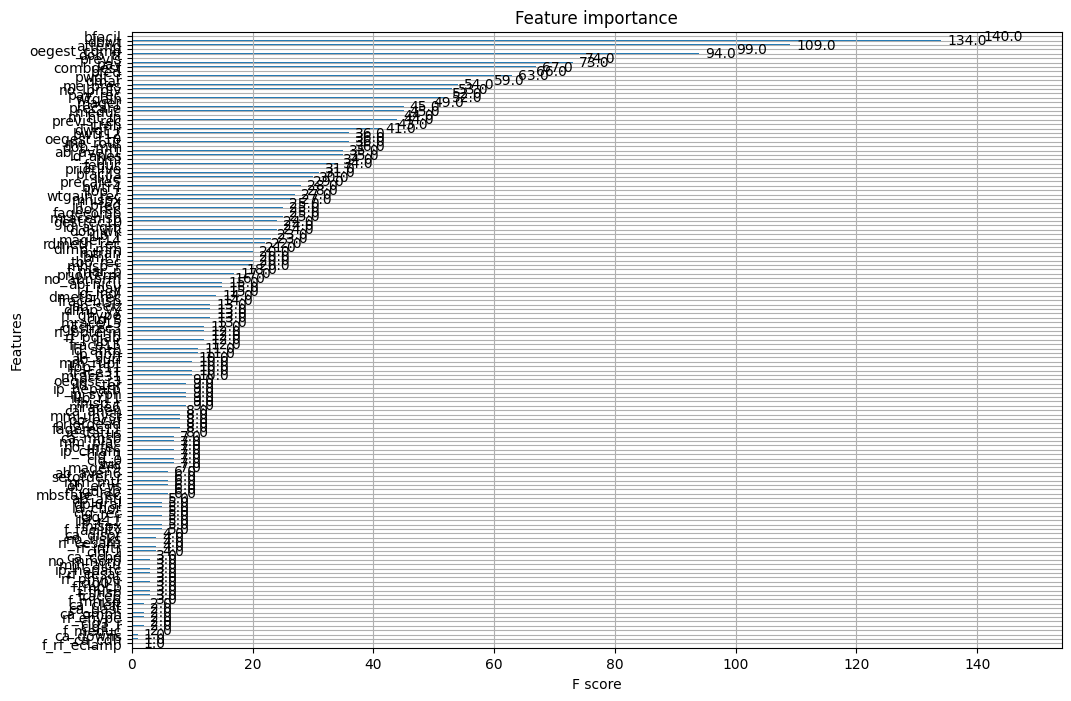

In [11]:
# plot feature importance scores
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(xgb_reg, ax=ax)
plt.show()

In [12]:
# get feature importance scores
importances = xgb_reg.feature_importances_

# create a dictionary that maps feature names to importance scores
feature_importances = dict(zip(X_train.columns, importances))

# sort the features by importance score in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# get the name of the most important feature
most_important_feature = sorted_features[0][0]

# print the name of the most important feature
print(f"The most important feature is: {most_important_feature}")


The most important feature is: bfacil


In [13]:
sorted_features

[('bfacil', 0.08056494),
 ('bfacil3', 0.06555065),
 ('frace6', 0.04850028),
 ('precare5', 0.048212476),
 ('ip_chlam', 0.048052445),
 ('attend', 0.039100364),
 ('rdmeth_rec', 0.03564807),
 ('no_lbrdlv', 0.03448651),
 ('combgest', 0.032125514),
 ('ca_cleft', 0.032060746),
 ('previs', 0.029539399),
 ('me_rout', 0.02549401),
 ('ilive', 0.021963479),
 ('bfed', 0.016255828),
 ('ip_gon', 0.015903939),
 ('dlmp_yy', 0.014334054),
 ('oegest_comb', 0.013826268),
 ('ld_antb', 0.013649674),
 ('ip_hepatb', 0.012975426),
 ('ip_syph', 0.012958441),
 ('dmar', 0.012798637),
 ('ab_aven1', 0.012647573),
 ('frace31', 0.012205982),
 ('ld_ster', 0.012095456),
 ('no_risks', 0.011706646),
 ('dmeth_rec', 0.011465202),
 ('pay_rec', 0.011367147),
 ('previs_rec', 0.009241552),
 ('oegest_r3', 0.008737205),
 ('bwtr12', 0.008461335),
 ('gestrec10', 0.008432864),
 ('fracehisp', 0.007887855),
 ('rf_pdiab', 0.0071429475),
 ('pay', 0.006875501),
 ('mm_aicu', 0.0068390686),
 ('frace15', 0.006818524),
 ('f_mar_p', 0.006335

In [14]:
most_important_feature

'bfacil'

RANDOM TREES

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
import pandas as pd

In [16]:


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('apgar5', axis=1), data['apgar5'], test_size=0.2, random_state=42)

# initialize a Random Forest Regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)

# evaluate the performance of the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
evs = explained_variance_score(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Explained Variance Score: {evs}")


R-squared: 0.3131111899342873
Mean Absolute Error: 0.9259494186537621
Mean Squared Error: 26.00703881422806
Root Mean Squared Error: 5.09970967940608
Explained Variance Score: 0.31319631323046004
